<a href="https://colab.research.google.com/github/heathjohn62/CS155-Fake-Deep/blob/main/miniproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np
import csv 

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from scipy import stats

data_url ='https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/data.txt'

     


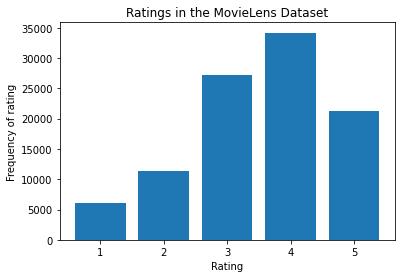

In [2]:
# All ratings in the MovieLens Dataset
import matplotlib.pyplot as plt
ratings =[]
uid = []
mid = []
data = pd.read_csv(data_url, delimiter="\t", header=None)
uid = np.array(data[0])
mid = np.array(data[1])
ratings = np.array(data[2])

labels, counts = np.unique(ratings, return_counts=True)
plt.bar(labels, counts, align='center')
plt.xlabel("Rating")
plt.ylabel("Frequency of rating")
plt.title("Ratings in the MovieLens Dataset")
plt.gca().set_xticks(labels)
plt.show()



[50, 258, 100, 181, 294, 286, 288, 1, 300, 121]
[ 242  302  377 ... 1090  225  203]


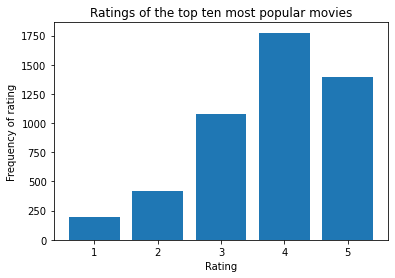

In [3]:
# All ratings of the ten most popular moveis (movies which have received the most ratings)
from collections import Counter
c = Counter(mid)
common_list = c.most_common(10) 
top_ten = [x[0] for x in common_list]
print(top_ten)
modified_data = np.array(data)

print(modified_data[:, 1])
top_ten_data = [x[2] for x in modified_data if x[1] in top_ten]

labels, counts = np.unique(top_ten_data, return_counts=True)
plt.bar(labels, counts, align='center')
plt.xlabel("Rating")
plt.ylabel("Frequency of rating")
plt.title("Ratings of the top ten most popular movies")
plt.gca().set_xticks(labels)
plt.show()


[1535 1499 1188 1200 1598 1121  813 1652 1466 1292]


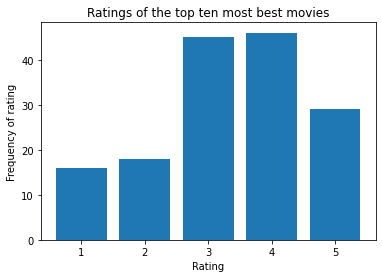

In [4]:
#all ratings of the ten best movies 
from collections import Counter
data = modified_data
data = pd.DataFrame(data= data, columns =["uid", "mid", "rating"])

grouped = np.array(data.groupby('mid', as_index=False).rating.mean())
best_ten = np.argsort(grouped[:,1])[-10:]
print(best_ten)
best_ten_data = [x[2] for x in modified_data if x[1] in best_ten]


labels, counts = np.unique(best_ten_data, return_counts=True)
plt.bar(labels, counts, align='center')
plt.xlabel("Rating")
plt.ylabel("Frequency of rating")
plt.title("Ratings of the top ten most best movies")
plt.gca().set_xticks(labels)
plt.show()



[2, 4, 17, 21, 22, 24, 27, 28, 29, 33, 39, 50, 53, 54, 62, 68, 73, 74, 79, 80, 82, 92, 96, 101, 110, 117, 118, 121, 127, 128, 144, 145, 147, 148, 161, 164, 172, 173, 174, 176, 177, 181, 183, 184, 186, 187, 188, 195, 201, 207, 210, 222, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 241, 244, 245, 247, 250, 252, 254, 257, 260, 263, 265, 266, 271, 273, 281, 295, 298, 300, 313, 314, 323, 326, 328, 334, 339, 343, 349, 350, 353, 358, 362, 363, 373, 374, 380, 385, 388, 391, 397, 398, 399, 403, 405, 426, 431, 435, 449, 450, 452, 453, 455, 456, 472, 491, 498, 510, 515, 526, 540, 541, 546, 550, 554, 562, 566, 568, 572, 576, 578, 586, 590, 597, 599, 631, 636, 651, 665, 668, 679, 680, 684, 685, 686, 689, 720, 743, 748, 751, 752, 755, 759, 761, 769, 771, 779, 797, 798, 802, 803, 806, 808, 809, 810, 825, 827, 829, 830, 831, 833, 838, 840, 841, 849, 855, 876, 879, 881, 890, 897, 912, 916, 917, 930, 976, 977, 982, 1013, 1016, 1019, 1025, 1027, 1034, 1076, 1087, 1088, 1089, 1105, 1110, 1138, 1139, 

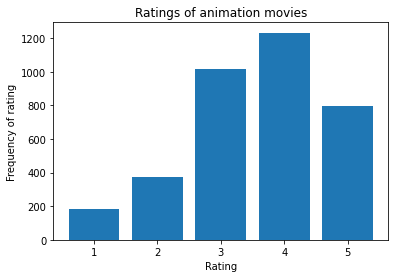

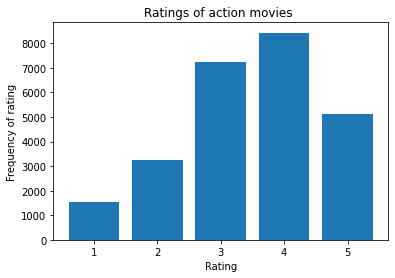

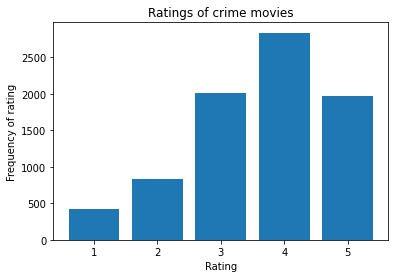

In [35]:
#All ratings of movies from three genres of your choice -> three separate visualizations 

movie_url ='https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/movies.txt'
movie_data = pd.read_csv(movie_url, delimiter="\t", header=None, encoding = 'latin-1')
movie_data = np.array(movie_data)
mid = np.array(movie_data[0])
action = [x[0] for x in movie_data if x[3] == 1]
print(action)
animation = [x[0] for x in movie_data if x[5] == 1]
crime = [x[0] for x in movie_data if x[8] == 1]

animation_ratings =  [x[2] for x in modified_data if x[1] in animation]
action_ratings =  [x[2] for x in modified_data if x[1] in action]
crime_ratings =  [x[2] for x in modified_data if x[1] in crime]

labels, counts = np.unique(animation_ratings, return_counts=True)
plt.bar(labels, counts, align='center')
plt.xlabel("Rating")
plt.ylabel("Frequency of rating")
plt.title("Ratings of animation movies")
plt.gca().set_xticks(labels)
plt.show()

labels, counts = np.unique(action_ratings, return_counts=True)
plt.bar(labels, counts, align='center')
plt.xlabel("Rating")
plt.ylabel("Frequency of rating")
plt.title("Ratings of action movies ")
plt.gca().set_xticks(labels)
plt.show()


labels, counts = np.unique(crime_ratings, return_counts=True)
plt.bar(labels, counts, align='center')
plt.xlabel("Rating")
plt.ylabel("Frequency of rating")
plt.title("Ratings of crime movies

")
plt.gca().set_xticks(labels)
plt.show()